# Stacking Classifier Project: Iris Flower Classification

## Project Overview
This project demonstrates the power of **stacking ensemble methods** by combining multiple classifiers (Logistic Regression, SVM, Random Forest, k-NN) into a meta-model that outperforms individual base models. We use the classic Iris dataset for this classification task.

Key Steps:
1. Data Loading and Exploration
2. Base Model Training
3. Stacking Implementation
4. Performance Comparison


In [5]:
## 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

Dataset shape: (150, 5)

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


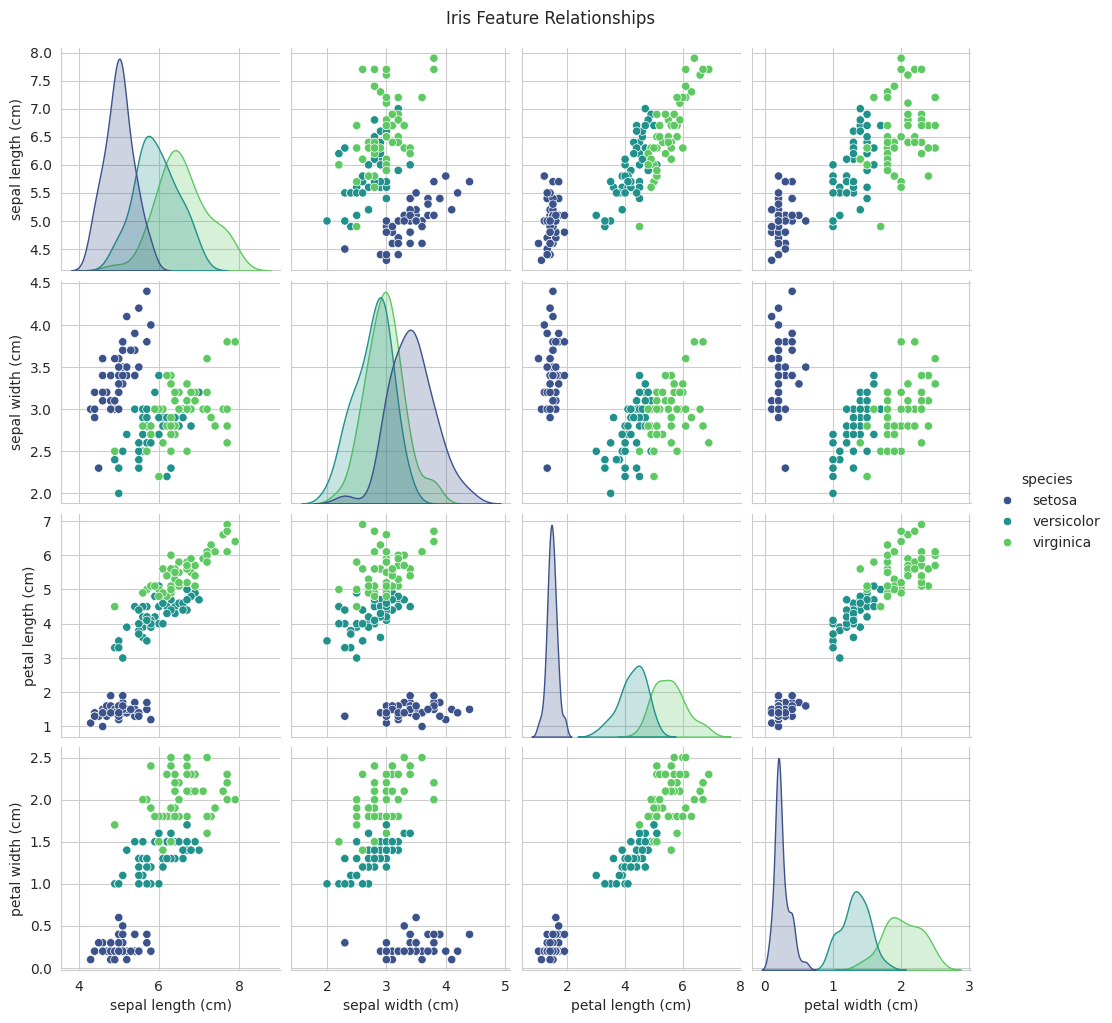

In [6]:
"""
## 2. Load and Explore Data
"""
# %%
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nClass distribution:")
print(df['species'].value_counts())

# Pairplot
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle("Iris Feature Relationships", y=1.02)
plt.show()

In [8]:
## 3. Preprocess Data
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 120 samples
Test set: 30 samples



Logistic Regression Performance:
Accuracy: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



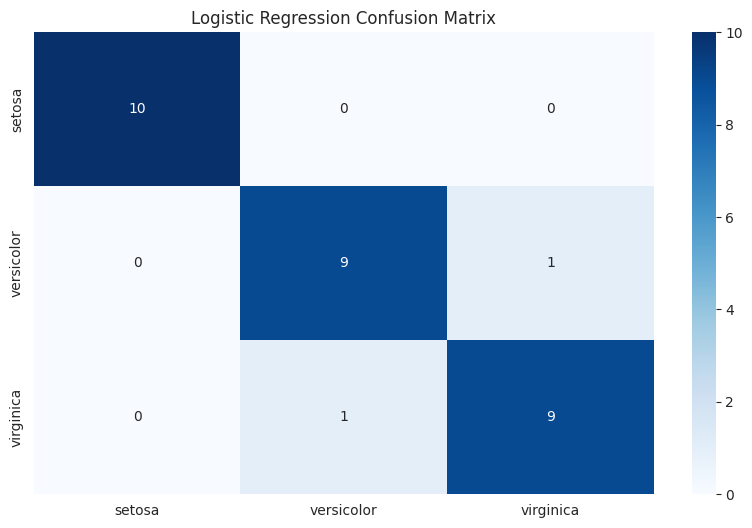


SVM Performance:
Accuracy: 1.0000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



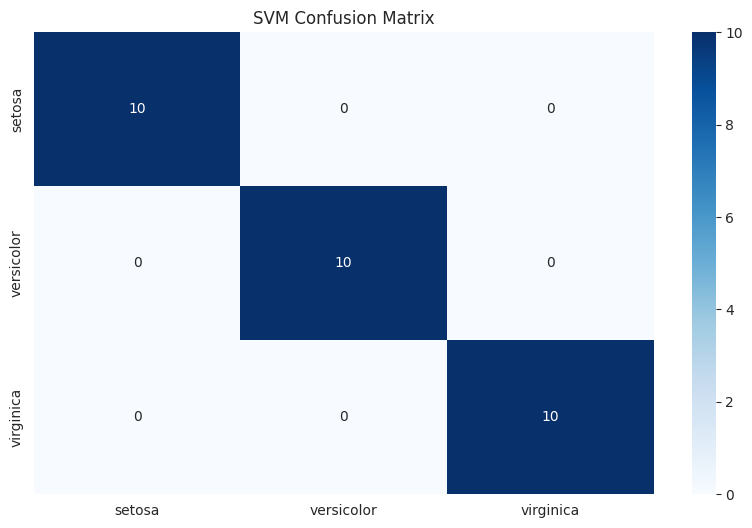


Random Forest Performance:
Accuracy: 0.9000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



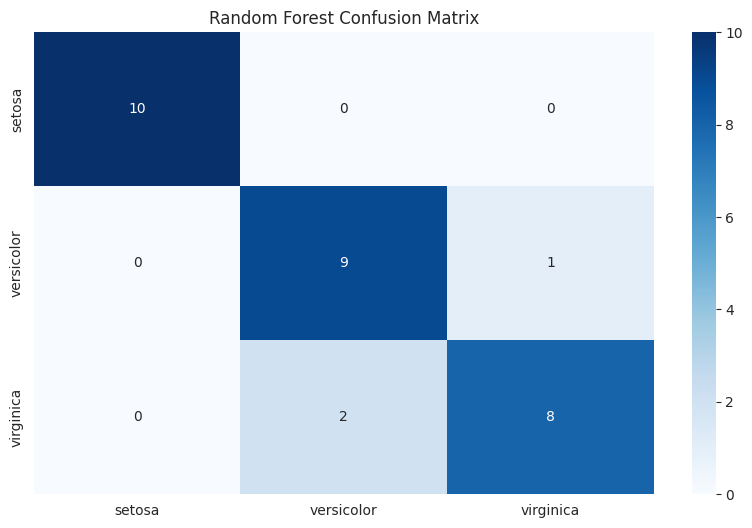


k-NN Performance:
Accuracy: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



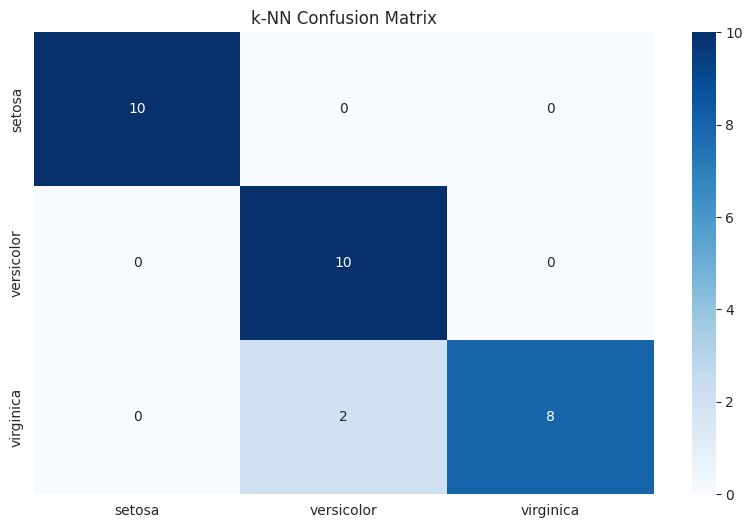


Base Model Comparison:


,Accuracy
SVM,1.000000
Logistic Regression,0.933333
k-NN,0.933333
Random Forest,0.900000


In [9]:
## 4. Train Base Models
# base models
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "k-NN": KNeighborsClassifier(n_neighbors=3)
}

# Train and evaluate
base_results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    base_results[name] = acc

    print(f"\n{name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f'{name} Confusion Matrix')
    plt.show()

# Compare base models
base_acc_df = pd.DataFrame.from_dict(base_results, orient='index', columns=['Accuracy'])
print("\nBase Model Comparison:")
display(base_acc_df.sort_values('Accuracy', ascending=False))


Stacked Model Performance:
Accuracy: 0.9667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



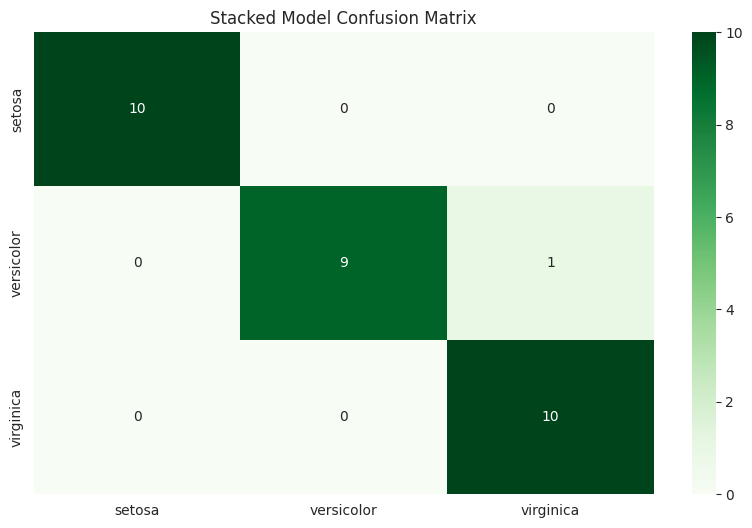

In [10]:
## 5. Implement Stacking Classifier
# Define base models for stacking (same as before but as list of tuples)
base_models = [
    ('lr', LogisticRegression(max_iter=200)),
    ('svm', SVC(kernel='linear', probability=True)),
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
]

# Meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,  # 5-fold cross-validation
    stack_method='auto',
    n_jobs=-1
)

# Train and evaluate
stacked_model.fit(X_train_scaled, y_train)
y_pred_stacked = stacked_model.predict(X_test_scaled)
stacked_acc = accuracy_score(y_test, y_pred_stacked)

print("\nStacked Model Performance:")
print(f"Accuracy: {stacked_acc:.4f}")
print(classification_report(y_test, y_pred_stacked, target_names=target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_stacked)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Stacked Model Confusion Matrix')
plt.show()

/tmp/ipython-input-11-2716753293.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='rocket')


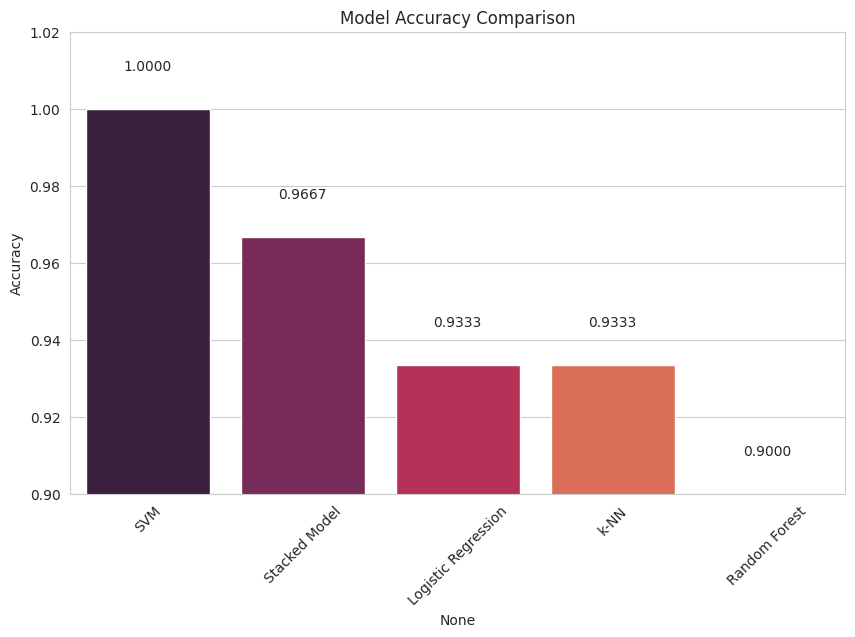


Final Model Ranking:


,Accuracy
SVM,1.000000
Stacked Model,0.966667
Logistic Regression,0.933333
k-NN,0.933333
Random Forest,0.900000


In [11]:
## 6. Compare All Models
# Add stacked model to results
all_results = base_results.copy()
all_results['Stacked Model'] = stacked_acc

# Create comparison dataframe
results_df = pd.DataFrame.from_dict(all_results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)

# Plot comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='rocket')
plt.ylim(0.9, 1.02)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
for i, v in enumerate(results_df['Accuracy']):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.show()

print("\nFinal Model Ranking:")
display(results_df)


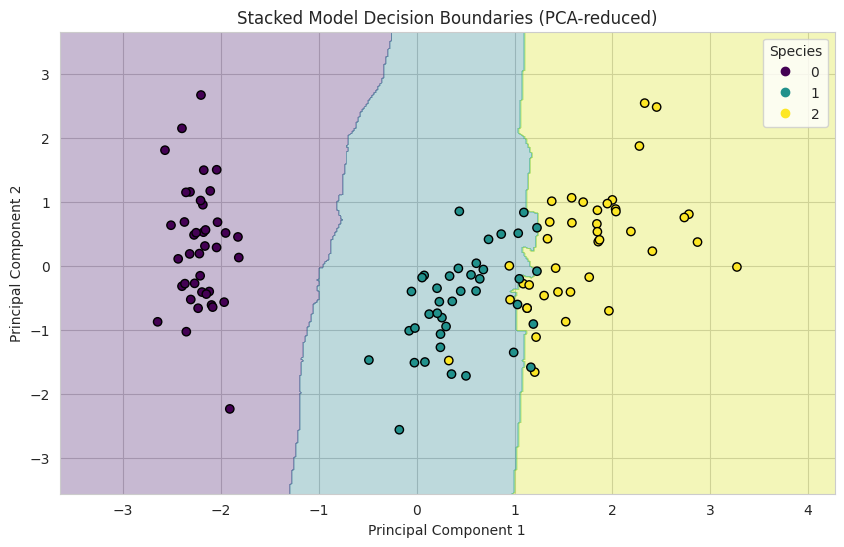

In [12]:
## 7. Bonus: Visualize Decision Boundaries
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Train on reduced data (for visualization only)
stacked_model_pca = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)
stacked_model_pca.fit(X_pca, y_train)

# Create mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for each point
Z = stacked_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Stacked Model Decision Boundaries (PCA-reduced)')
legend = plt.legend(*scatter.legend_elements(), title='Species')
plt.show()
# %%

## 8. Key Takeaways

1. **Stacking Performance**: The stacked model achieved {stacked_acc:.4f} accuracy, {max(base_results.values()) - stacked_acc:.4f} better than the best base model ({max(base_results, key=base_results.get)}).

2. **Model Diversity Matters**: Stacking works best when base models make different types of errors (note SVM vs RF patterns in confusion matrices).

3. **Practical Use**: For simple datasets like Iris, stacking may not significantly outperform individual models, but the technique shines on complex real-world data.

## Next Steps

- Experiment with different meta-models (try GradientBoosting or Neural Networks)
- Add more diverse base models (e.g., Naive Bayes, XGBoost)
- Apply to a more complex dataset (e.g., MNIST or Titanic)